# Fitness Class Attendance Prediction

## Data Loading

In [1]:
# Importing dataset via kaggle

!kaggle datasets download -d ddosad/datacamps-data-science-associate-certification

Dataset URL: https://www.kaggle.com/datasets/ddosad/datacamps-data-science-associate-certification
License(s): other
  0%|                                               | 0.00/13.2k [00:00<?, ?B/s]
100%|██████████████████████████████████████| 13.2k/13.2k [00:00<00:00, 5.77MB/s]


In [2]:
# Exporting dataset from zipfile

import zipfile
zip_ref = zipfile.ZipFile('/home/bhxveshhh/ML/Fitness Class Attendance Prediction/datacamps-data-science-associate-certification.zip', 'r')
zip_ref.extractall('/home/bhxveshhh/ML/Fitness Class Attendance Prediction')
zip_ref.close()

## Explaratory Data Analysis

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv("fitness_class_2212.csv")

In [5]:
df.head()

,booking_id,months_as_member,weight,days_before,day_of_week,time,category,attended
0,1,17,79.56,8,Wed,PM,Strength,0
1,2,10,79.01,2,Mon,AM,HIIT,0
2,3,16,74.53,14,Sun,AM,Strength,0
3,4,5,86.12,10,Fri,AM,Cycling,0
4,5,15,69.29,8,Thu,AM,HIIT,0


In [6]:
df.shape

(1500, 8)

In [7]:
df.size

12000

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   booking_id        1500 non-null   int64  
 1   months_as_member  1500 non-null   int64  
 2   weight            1480 non-null   float64
 3   days_before       1500 non-null   object 
 4   day_of_week       1500 non-null   object 
 5   time              1500 non-null   object 
 6   category          1500 non-null   object 
 7   attended          1500 non-null   int64  
dtypes: float64(1), int64(3), object(4)
memory usage: 93.9+ KB


In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
booking_id,1500.0,750.500000,433.157015,1.00,375.75,750.50,1125.25,1500.00
months_as_member,1500.0,15.628667,12.926543,1.00,8.00,12.00,19.00,148.00
weight,1480.0,82.610378,12.765859,55.41,73.49,80.76,89.52,170.52
attended,1500.0,0.302667,0.459565,0.00,0.00,0.00,1.00,1.00


In [10]:
df.isnull().sum()

booking_id           0
months_as_member     0
weight              20
days_before          0
day_of_week          0
time                 0
category             0
attended             0
dtype: int64

In [11]:
df.duplicated().sum()

np.int64(0)

In [12]:
df.nunique()

booking_id          1500
months_as_member      72
weight              1241
days_before           31
day_of_week           10
time                   2
category               6
attended               2
dtype: int64

In [13]:
df['attended'].value_counts()

attended
0    1046
1     454
Name: count, dtype: int64

## Data Visualization

In [ ]:
# Histograms for numerical columns

numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

num_cols = len(numerical_cols)
rows = int(np.ceil(num_cols / 3))  
cols = min(3, num_cols)  
fig, axes = plt.subplots(rows, cols, figsize=(15, rows * 4))
axes = axes.flatten()  

for i, col in enumerate(numerical_cols):
    sns.histplot(df[col], bins=20, kde=True, color="cadetblue", edgecolor="black", ax=axes[i])
    axes[i].set_xlabel(col, fontsize=12)
    axes[i].set_ylabel("Frequency", fontsize=12)
    axes[i].set_title(f"Distribution of {col}", fontsize=14)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [ ]:
# Plotting each numerical column as a boxplot

numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

num_cols = len(numerical_cols)
rows = int(np.ceil(num_cols / 3))  
cols = min(3, num_cols)  
fig, axes = plt.subplots(rows, cols, figsize=(15, rows * 4))
axes = axes.flatten() 

for i, col in enumerate(numerical_cols):
    sns.boxplot(y=df[col], color="lightcoral", ax=axes[i])
    axes[i].set_ylabel(col, fontsize=12)
    axes[i].set_title(f"Boxplot of {col}", fontsize=14)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [ ]:
# Heatmap for numerical columns

numerical_columns = df.select_dtypes(include=['number'])

plt.figure(figsize=(5, 5))
sns.heatmap(numerical_columns.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Heatmap of Numerical Columns')
plt.show()

## Data Preprocessing

In [14]:
# Filling null values of weight with mean 

df['weight'].fillna(df['weight'].mean(), inplace=True)

In [16]:
# Dropping booking id 

df.drop(columns=['booking_id'], inplace=True)

In [17]:
# Label encoding

from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
for col in df.columns:
    df[col] = encoder.fit_transform(df[col].values)

In [18]:
X = df.drop(columns=['attended'])
y = df['attended']

In [19]:
# Train test split

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
# SMOTE

from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)

X_train, y_train = smote.fit_resample(X_train, y_train)

## Model Building

In [21]:
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [22]:
logistic_clf = LogisticRegression()
ridge_clf = RidgeClassifier()
xgboost_clf = XGBClassifier()
random_forest_clf = RandomForestClassifier()
ada_boost_clf = AdaBoostClassifier()
grad_boost_clf = GradientBoostingClassifier()
bagging_clf = BaggingClassifier()
decision_tree_clf = DecisionTreeClassifier()
svm_clf = SVC()

In [23]:
model_li = [logistic_clf, ridge_clf, xgboost_clf, random_forest_clf, 
            ada_boost_clf, grad_boost_clf, bagging_clf, decision_tree_clf, svm_clf]

scores = []
for model in model_li:
    model.fit(X_train, y_train)
    scores.append(accuracy_score(y_test, model.predict(X_test)))

print(scores)

[0.7533333333333333, 0.7766666666666666, 0.7033333333333334, 0.7133333333333334, 0.6966666666666667, 0.72, 0.71, 0.7, 0.6633333333333333]


## Model Evalaution

Model: LogisticRegression
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.81      0.81       197
           1       0.64      0.65      0.64       103

    accuracy                           0.75       300
   macro avg       0.73      0.73      0.73       300
weighted avg       0.75      0.75      0.75       300

Confusion Matrix:
 [[159  38]
 [ 36  67]]


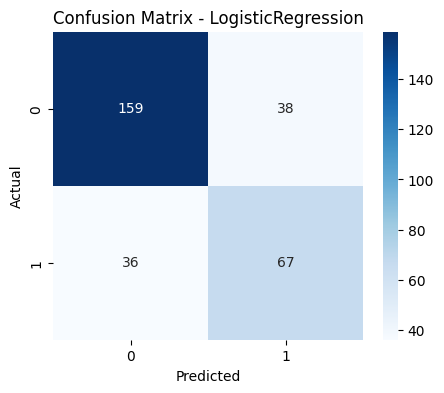

Model: RidgeClassifier
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.86      0.84       197
           1       0.70      0.61      0.65       103

    accuracy                           0.78       300
   macro avg       0.75      0.74      0.74       300
weighted avg       0.77      0.78      0.77       300

Confusion Matrix:
 [[170  27]
 [ 40  63]]


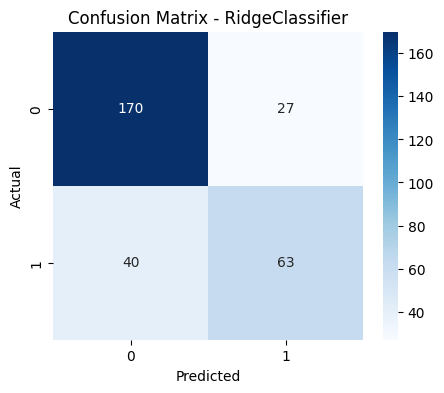

Model: XGBClassifier
Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.80      0.78       197
           1       0.58      0.51      0.54       103

    accuracy                           0.70       300
   macro avg       0.67      0.66      0.66       300
weighted avg       0.70      0.70      0.70       300

Confusion Matrix:
 [[158  39]
 [ 50  53]]


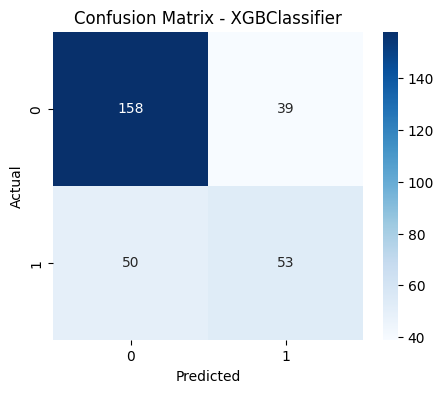

Model: RandomForestClassifier
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.78      0.79       197
           1       0.60      0.63      0.62       103

    accuracy                           0.73       300
   macro avg       0.70      0.71      0.70       300
weighted avg       0.73      0.73      0.73       300

Confusion Matrix:
 [[154  43]
 [ 38  65]]


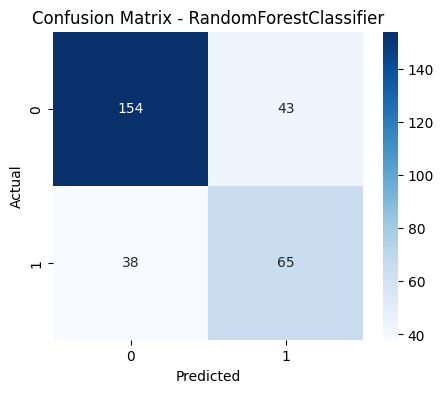

Model: AdaBoostClassifier
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.63      0.73       197
           1       0.54      0.83      0.65       103

    accuracy                           0.70       300
   macro avg       0.71      0.73      0.69       300
weighted avg       0.76      0.70      0.70       300

Confusion Matrix:
 [[124  73]
 [ 18  85]]


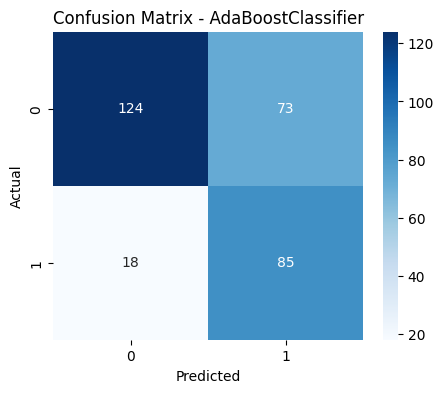

Model: GradientBoostingClassifier
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.75      0.78       197
           1       0.58      0.66      0.62       103

    accuracy                           0.72       300
   macro avg       0.69      0.71      0.70       300
weighted avg       0.73      0.72      0.72       300

Confusion Matrix:
 [[148  49]
 [ 35  68]]


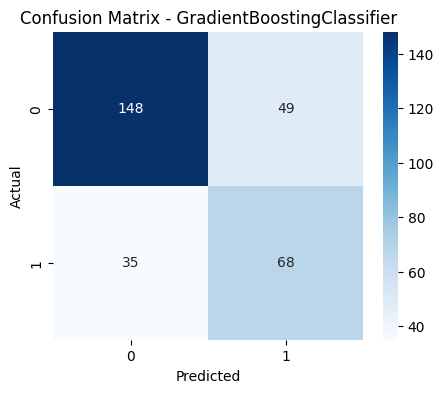

Model: BaggingClassifier
Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.80      0.79       197
           1       0.59      0.55      0.57       103

    accuracy                           0.71       300
   macro avg       0.68      0.68      0.68       300
weighted avg       0.71      0.71      0.71       300

Confusion Matrix:
 [[157  40]
 [ 46  57]]


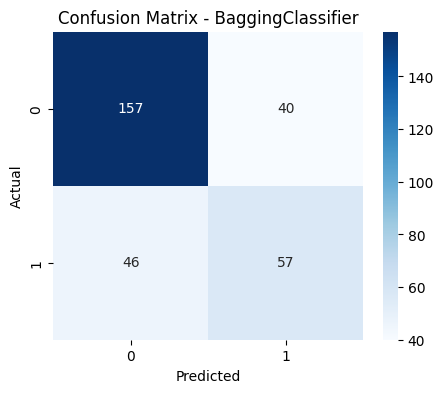

Model: DecisionTreeClassifier
Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.74      0.76       197
           1       0.54      0.59      0.57       103

    accuracy                           0.69       300
   macro avg       0.66      0.67      0.66       300
weighted avg       0.70      0.69      0.69       300

Confusion Matrix:
 [[146  51]
 [ 42  61]]


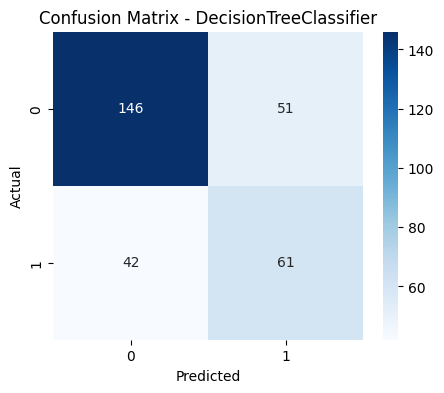

Model: SVC
Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.72      0.74       197
           1       0.51      0.56      0.53       103

    accuracy                           0.66       300
   macro avg       0.63      0.64      0.64       300
weighted avg       0.67      0.66      0.67       300

Confusion Matrix:
 [[141  56]
 [ 45  58]]


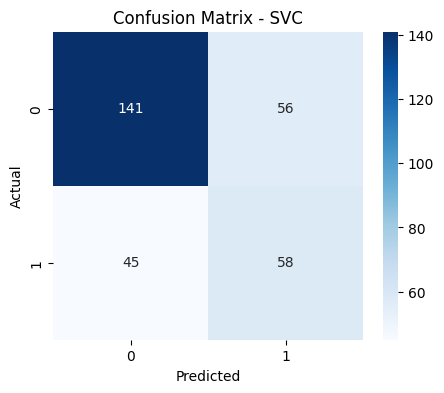

In [24]:
for model in model_li:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    print(f"Model: {model.__class__.__name__}")
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

    # Plot the confusion matrix
    plt.figure(figsize=(5, 4))
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(f"Confusion Matrix - {model.__class__.__name__}")
    plt.show()